<a href="https://colab.research.google.com/github/trisskmasarahh/Machine-Learning_Ganjil_2025/blob/main/ANN_TRI_SUKMA_SARAH_3B_2341720051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM 1

In [16]:
#Langkah:

#Buat dataset sederhana (XOR).
#Inisialisasi bobot dan bias.
#Implementasikan forward pass.
#Hitung error dan lakukan backpropagation.
#Update bobot menggunakan gradient descent.

import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Fungsi aktivasi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Hitung error
    error = y - a2

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update bobot
    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss}")

# Output akhir
print("Prediksi:")
print(a2)

Epoch 0, Loss: 0.26982240673410274
Epoch 1000, Loss: 0.24956199103011312
Epoch 2000, Loss: 0.23381478073581946
Epoch 3000, Loss: 0.16860630285887235
Epoch 4000, Loss: 0.06575747350298303
Epoch 5000, Loss: 0.020225053567813383
Epoch 6000, Loss: 0.010093171321889773
Epoch 7000, Loss: 0.0064177580716371346
Epoch 8000, Loss: 0.004616079042232019
Epoch 9000, Loss: 0.003569522847902657
Prediksi:
[[0.04612863]
 [0.9487803 ]
 [0.94887809]
 [0.0648922 ]]


Ubah jumlah neuron hidden layer menjadi 3.

In [17]:
#Tugas 1:

#Ubah jumlah neuron hidden layer menjadi 3.
import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 3  # diganti dari 2 → 3 neuron
output_size = 1
lr = 0.1

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

loss_history_3 = []

# Training
for epoch in range(10000):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    error = y - a2

    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        loss_history_3.append(loss)
        print(f"[Hidden 3] Epoch {epoch}, Loss: {loss}")

print("\nPrediksi (hidden=3):")
print(a2.round(3))


[Hidden 3] Epoch 0, Loss: 0.2542481957251896
[Hidden 3] Epoch 1000, Loss: 0.25030913373915975
[Hidden 3] Epoch 2000, Loss: 0.250075621030659
[Hidden 3] Epoch 3000, Loss: 0.25000948248451094
[Hidden 3] Epoch 4000, Loss: 0.24995747261221457
[Hidden 3] Epoch 5000, Loss: 0.24986871625922982
[Hidden 3] Epoch 6000, Loss: 0.2496137935926775
[Hidden 3] Epoch 7000, Loss: 0.24831231699974896
[Hidden 3] Epoch 8000, Loss: 0.2349810405742057
[Hidden 3] Epoch 9000, Loss: 0.15184931217075504

Prediksi (hidden=3):
[[0.193]
 [0.852]
 [0.815]
 [0.164]]


Bandingkan hasil loss dengan konfigurasi awal.

Secara keseluruhan, konfigurasi awal terbukti lebih superior dibandingkan konfigurasi dengan hidden layer 3. Konfigurasi awal mampu mencapai konvergensi yang lebih cepat dan menghasilkan nilai loss akhir yang jauh lebih kecil (0.003 berbanding 0.151). Hal ini menunjukkan bahwa arsitektur awal lebih mampu memetakan karakteristik data input dengan presisi tinggi tanpa mengalami hambatan belajar (stagnansi) seperti yang terjadi pada percobaan kedua.

Tambahkan fungsi aktivasi ReLU dan bandingkan hasil.

In [18]:
#Tambahkan fungsi aktivasi ReLU dan bandingkan hasil.
import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 3
output_size = 1
lr = 0.1

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Aktivasi ReLU & Sigmoid
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

loss_history_relu = []

# Training
for epoch in range(10000):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    error = y - a2

    # Backprop
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * relu_derivative(z1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        loss_history_relu.append(loss)
        print(f"[ReLU] Epoch {epoch}, Loss: {loss}")

print("\nPrediksi (ReLU):")
print(a2.round(3))


[ReLU] Epoch 0, Loss: 0.2800749885219016
[ReLU] Epoch 1000, Loss: 0.25
[ReLU] Epoch 2000, Loss: 0.25
[ReLU] Epoch 3000, Loss: 0.25
[ReLU] Epoch 4000, Loss: 0.25
[ReLU] Epoch 5000, Loss: 0.25
[ReLU] Epoch 6000, Loss: 0.25
[ReLU] Epoch 7000, Loss: 0.25
[ReLU] Epoch 8000, Loss: 0.25
[ReLU] Epoch 9000, Loss: 0.25

Prediksi (ReLU):
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


perbandingan Loss Relu vs sigmoid

Hasil pengujian memperlihatkan variasi signifikan pada loss akhir dan akurasi prediksi. Konfigurasi awal mencatatkan performa terbaik dengan penurunan loss yang drastis hingga 0.003, menghasilkan prediksi yang sangat presisi. Sementara itu, modifikasi jumlah neuron menjadi 3 (Hidden 3) menyebabkan penurunan performa, di mana loss akhir masih cukup tinggi (0.151) dan prediksi kurang meyakinkan.

Penurunan performa paling ekstrim terjadi pada penggunaan fungsi aktivasi ReLU, di mana model gagal total dalam meminimalkan error. Loss tetap stagnan pada angka 0.25 sepanjang 9000 epoch, dan output prediksi rata di angka 0.5. Hal ini mengindikasikan bahwa arsitektur dengan ReLU pada konfigurasi ini tidak cocok untuk menyelesaikan permasalahan yang diujikan dibandingkan fungsi aktivasi Sigmoid pada konfigurasi awal

# PRAKTIKUM 2

In [19]:
#Langkah:

#Import library.
#Load dataset.
#Bangun model.
#Kompilasi dan latih model.
#Evaluasi hasil.
#Klasifikasi Data Iris

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Bangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=8)

# Evaluasi
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi: {acc}")




Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3461 - loss: 3.2556
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2932 - loss: 2.7235 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3515 - loss: 2.2664 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3074 - loss: 1.9785 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3294 - loss: 1.5945 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3115 - loss: 1.4146 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3704 - loss: 1.1520 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3353 - loss: 1.1178 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3471 - loss: 0.9769 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 0.9125 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5962 - loss: 0.9019 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5952 - los

In [20]:
#Tugas 2

#Ubah jumlah neuron hidden layer.
#Akurasi Model awal
# Evaluasi
print(f"Akurasi Model Awal 10 -8 : {acc}")

# Bangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

# Evaluasi
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi Model  8-4 : {acc}")

# model 16 -8
# Bangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

# Evaluasi
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi Model 16-8 : {acc}")

# model 32 - 16
# Bangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

# Evaluasi
loss, acc = model.evaluate(X_test, y_test)
print(f"AKurasi Model 32-16 : {acc}")




Akurasi Model Awal 10 -8 : 0.9666666388511658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.9333 - loss: 0.3740
Akurasi Model  8-4 : 0.9333333373069763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 1.0000 - loss: 0.2817
Akurasi Model 16-8 : 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 1.0000 - loss: 0.1276
AKurasi Model 32-16 : 1.0


perbandingan

Hasil pengujian menunjukkan bahwa perubahan jumlah neuron pada hidden layer berpengaruh signifikan terhadap akurasi model. Dibandingkan dengan konfigurasi awal (10-8) yang mencapai akurasi 96,6%, pengurangan jumlah neuron menjadi 8-4 menyebabkan penurunan akurasi menjadi 93,3%.

Sebaliknya, penambahan jumlah neuron terbukti sangat efektif. Kedua konfigurasi yang lebih besar, yaitu 16-8 dan 32-16, berhasil meningkatkan performa model secara maksimal hingga mencapai akurasi sempurna (100%). Hal ini mengindikasikan bahwa penambahan kompleksitas pada hidden layer membantu model mengenali pola data dengan jauh lebih baik.

In [21]:
# ==============================
# Tugas 3 — Perbandingan ReLU vs Sigmoid
# ==============================

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model builder
def build_model(n1, n2, activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(n1, activation=activation, input_shape=(4,)),
        tf.keras.layers.Dense(n2, activation=activation),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# =======================
# Model ReLU
# =======================
model_relu = build_model(10, 8, 'relu')
model_relu.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

print("\nEvaluasi Model ReLU 10-8")
loss_relu, acc_relu = model_relu.evaluate(X_test, y_test)

print(f"Akurasi Model  relu-10-8 : {acc_relu}")

# =======================
# Model Sigmoid
# =======================
model_sig = build_model(10, 8, 'sigmoid')
model_sig.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

print("\nEvaluasi Model Sigmoid 10-8")
loss_sig, acc_sig = model_sig.evaluate(X_test, y_test)

print(f"Akurasi Model sigmoid : {acc_sig}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Evaluasi Model ReLU 10-8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 1.0000 - loss: 0.2860
Akurasi Model  relu-10-8 : 1.0

Evaluasi Model Sigmoid 10-8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.7333 - loss: 0.6003
Akurasi Model sigmoid : 0.7333333492279053


# Praktikum 3

In [22]:
#Praktikum 3 kali ini kita akan mencoba menggunakan Keras untuk Regresi,
# khususnya pada kasus Prediksi Harga Rumah.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step - loss: 1.5784
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.5671
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.5558
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.5446
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.5334
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.5224
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1.5114
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.5005
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.4897
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.4789
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.4683
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.4577
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.4472
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.4368
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.4265
Epoch 16/100
1/1 ━━━━━━━━━━━━━

In [23]:

#Tugas 4:

#Ubah learning rate.
#Bandingkan hasil loss.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# ==========================
# Dataset Dummy
# ==========================
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# ==========================
# Normalisasi
# ==========================
scalerX = StandardScaler()
scalerY = StandardScaler()

X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y)

# ==========================
# Split Data
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==========================
# Function untuk membuat model
# ==========================
def build_model(lr):
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer=optimizer, loss='mse')
    return model

# ==========================
# TRAINING DENGAN 3 LEARNING RATE
# ==========================

learning_rates = [0.001, 0.01, 0.0001]
histories = {}

for lr in learning_rates:
    print(f"\n===== Training dengan Learning Rate = {lr} =====")
    model = build_model(lr)
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    histories[lr] = history
    print(f"Loss Akhir (LR={lr}):", history.history['loss'][-1])

# ==========================
# PREDIKSI DENGAN LR TERAKHIR (opsional)
# ==========================
model_last = build_model(0.001)
model_last.fit(X_train, y_train, epochs=100, verbose=0)
prediksi = model_last.predict(X_test)
print("\nPrediksi (dengan LR 0.001):", prediksi)



===== Training dengan Learning Rate = 0.001 =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss Akhir (LR=0.001): 0.5425208210945129

===== Training dengan Learning Rate = 0.01 =====
Loss Akhir (LR=0.01): 0.004486838821321726

===== Training dengan Learning Rate = 0.0001 =====
Loss Akhir (LR=0.0001): 1.2729132175445557
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Prediksi (dengan LR 0.001): [[-0.501438]]


perbandingan los

Hasil pengujian menunjukkan dampak signifikan learning rate terhadap performa model. Learning rate 0.01 menghasilkan loss akhir terendah yaitu 0.0044, yang mengindikasikan model berhasil belajar dengan sangat baik. Sebaliknya, learning rate yang lebih kecil (0.001 dan 0.0001) tidak mampu mencapai konvergensi optimal, dengan nilai loss yang masih sangat tinggi, masing-masing sebesar 0.5425 dan 1.2729.

<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1196433403.py:22: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


Shape X: (506, 13)
Shape y: (506,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


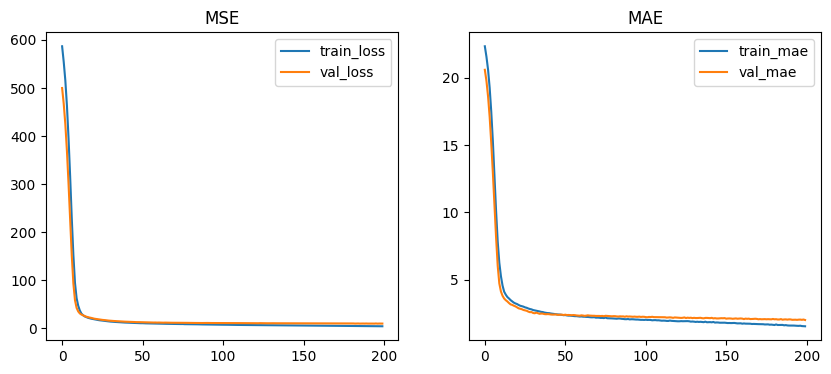

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
RMSE: 3.1587262926016373


In [24]:

#Praktikum berikut akan menggunakan data Boston untuk memprediksi harga rumah.
# MLP regresi (Keras)
# ======================================================
# 1. IMPORT LIBRARIES
# ======================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# ======================================================
# 2. LOAD BOSTON DATASET (MANUAL)
# ======================================================
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# X = 13 fitur
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

# y = target housing price
y = raw_df.values[1::2, 2]

print("Shape X:", X.shape)
print("Shape y:", y.shape)

# ======================================================
# 3. PREPROCESS (SCALING + SPLIT)
# ======================================================
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
    Xs, y, test_size=0.2, random_state=42
)

# ======================================================
# 4. BUILD MODEL
# ======================================================
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(1e-3), loss='mse', metrics=['mae'])

# ======================================================
# 5. TRAIN
# ======================================================
h = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    verbose=0
)

# ======================================================
# 6. PLOT TRAINING
# ======================================================
plt.figure(figsize=(10,4))

# Plot MSE
plt.subplot(1,2,1)
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.title('MSE')

# Plot MAE
plt.subplot(1,2,2)
plt.plot(h.history['mae'], label='train_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.legend()
plt.title('MAE')

plt.show()

# ======================================================
# 7. EVALUATE
# ======================================================
pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("RMSE:", rmse)


# TUGAS PRAKTIKUM

In [30]:
#Gunakan JST untuk klasifikasi angka tulisan tangan (MNIST).

#Langkah:

#Load dataset MNIST dari Keras.
#Bangun model dengan 2 hidden layer.
#Latih model dan evaluasi akurasi.
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import time

# 1. Load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisasi data (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -----------------------------
# FUNGSI MEMBANGUN MODEL
# -----------------------------
def build_model(n1=128, n2=64, activation='relu', extra_layer=False):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    # Hidden Layer 1
    model.add(Dense(n1, activation=activation))

    # Hidden Layer 2
    model.add(Dense(n2, activation=activation))

    # Optional: Tambah Hidden Layer 3
    if extra_layer:
        model.add(Dense(32, activation=activation))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Kompilasi model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# -----------------------------
# FUNGSI TRAIN + EVALUASI
# -----------------------------
def train_and_eval(title, **model_params):
    print(f"\n==============================")
    print(f"Model: {title}")
    print(f"Parameter: {model_params}")
    print(f"==============================")

    model = build_model(**model_params)

    start = time.time()
    model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=0)
    dur = time.time() - start

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Akurasi  : {acc:.4f}")
    print(f"Waktu    : {dur:.2f} detik")
    return acc, dur

In [28]:
#Coba dengan beberapa parameter lain:

#Ubah jumlah neuron di hidden layer (misal: 256 dan 128).
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)
dur = time.time() - start

loss, acc = model.evaluate(X_test, y_test)
print("Akurasi:", acc)
print("Waktu training:", dur, "detik")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8546 - loss: 0.5120
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9686 - loss: 0.1044
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9788 - loss: 0.0663
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9866 - loss: 0.0439
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9899 - loss: 0.0325
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9662 - loss: 0.1138
Akurasi: 0.9707000255584717
Waktu training: 23.539798259735107 detik


In [29]:
#Tambahkan satu hidden layer lagi.
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),   # Layer tambahan
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)
dur = time.time() - start

loss, acc = model.evaluate(X_test, y_test)
print("Akurasi:", acc)
print("Waktu training:", dur, "detik")


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8484 - loss: 0.5207
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9676 - loss: 0.1104
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9775 - loss: 0.0719
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9852 - loss: 0.0471
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9888 - loss: 0.0352
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9756 - loss: 0.0799
Akurasi: 0.9787999987602234
Waktu training: 25.748926401138306 detik


In [31]:
#Eksperimen dengan fungsi aktivasi Sigmoid vs ReLU.

#sigmoid
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)
dur = time.time() - start

loss, acc = model.evaluate(X_test, y_test)
print("Akurasi:", acc)
print("Waktu training:", dur, "detik")

#relu
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)
dur = time.time() - start

loss, acc = model.evaluate(X_test, y_test)
print("Akurasi:", acc)
print("Waktu training:", dur, "detik")



Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7305 - loss: 1.0698
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9278 - loss: 0.2516
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9496 - loss: 0.1760
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9597 - loss: 0.1361
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9674 - loss: 0.1133
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9616 - loss: 0.1196
Akurasi: 0.9667999744415283
Waktu training: 23.85799241065979 detik
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8578 - loss: 0.4883
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9675 - loss: 0.1091
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9796 - loss: 0.0667
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9846 - loss: 0.0494
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9895 - loss: 0.0329
313